Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
  0% 0.00/98.8M [00:00<?, ?B/s]
100% 98.8M/98.8M [00:00<00:00, 1.14GB/s]
Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 96s 34ms/step - accuracy: 0.9026 - loss: 0.5935 - val_accuracy: 0.9595 - val_loss: 0.1416
Epoch 2/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 92s 34ms/step - accuracy: 0.9493 - loss: 0.1831 - val_accuracy: 0.9573 - val_loss: 0.1399
Epoch 3/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 96s 35ms/step - accuracy: 0.9564 - loss: 0.1613 - val_accuracy: 0.9639 - val_loss: 0.1541
Epoch 4/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 138s 33ms/step - accuracy: 0.9616 - loss: 0.1479 - val_accuracy: 0.9660 - val_loss: 0.1731
Epoch 5/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 143s 34ms/step - accuracy: 0.9638 - loss: 0.1483 - val_accuracy: 0.9735 - val_loss: 0.1137
Epoch 6/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 93s 34ms/step - accuracy: 0.9643 - loss: 0.1383 - val_accuracy: 0.9678 - val_loss: 0.1496
Epoch 7/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 143s 34ms/step - accuracy: 0.9670 - loss: 0.1339 - val_accuracy: 0.9688 - val_loss: 0.1572
Epoch 8/15
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 141s 34ms/step - accuracy: 0.96

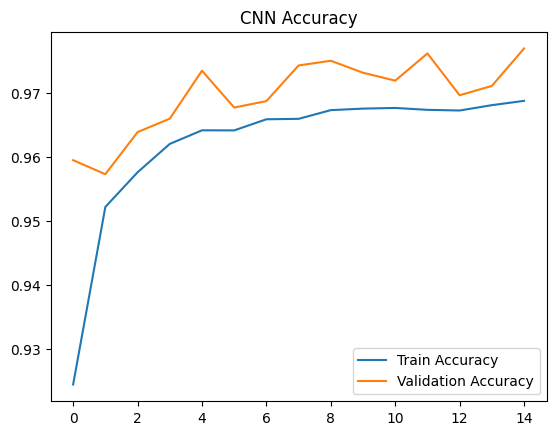


Classification Report:
              precision    recall  f1-score   support

         0.0     0.9780    0.9976    0.9877     18118
         1.0     0.9452    0.5899    0.7265       556
         2.0     0.9516    0.9227    0.9369      1448
         3.0     0.9167    0.6111    0.7333       162
         4.0     0.9987    0.9639    0.9810      1608

    accuracy                         0.9770     21892
   macro avg     0.9580    0.8170    0.8731     21892
weighted avg     0.9765    0.9770    0.9754     21892


Confusion Matrix:
[[18075    12    29     0     2]
 [  218   328    10     0     0]
 [   96     7  1336     9     0]
 [   40     0    23    99     0]
 [   52     0     6     0  1550]]

Per-Class Accuracy:
Class 0: 0.9976
Class 1: 0.5899
Class 2: 0.9227
Class 3: 0.6111
Class 4: 0.9639


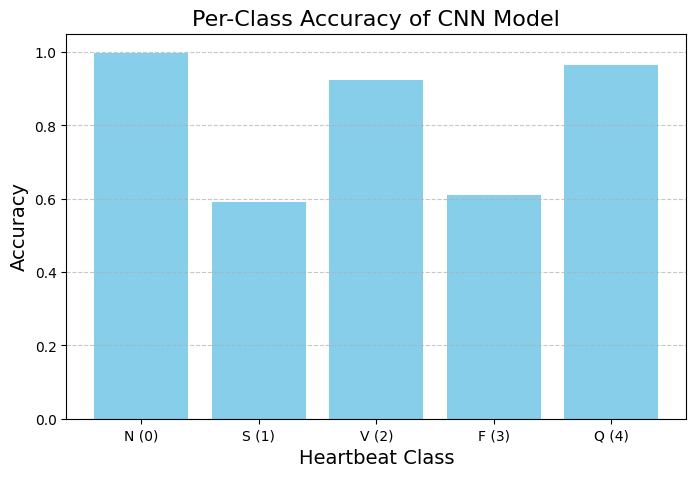

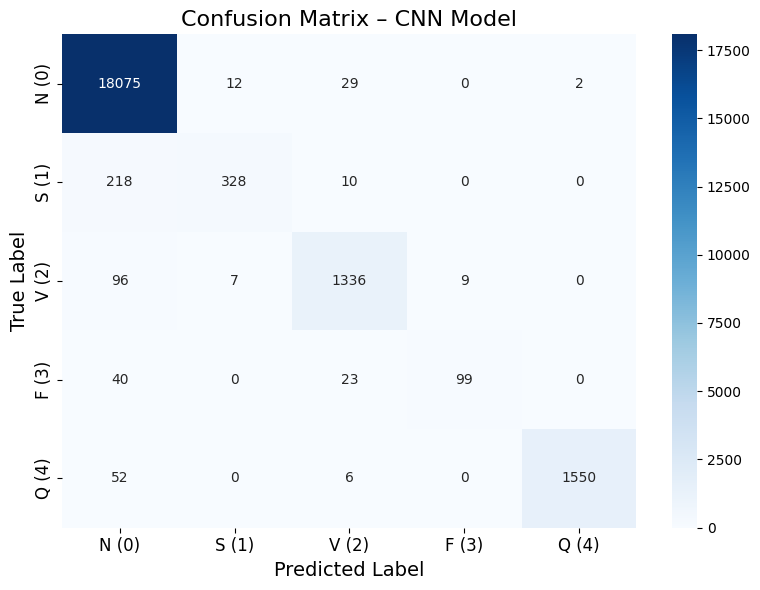

In [ ]:
# @title Default title text
#  Install Kaggle & Download Dataset
!pip install kaggle -q
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip heartbeat.zip

#  Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#  Load Dataset
df = pd.read_csv("mitbih_train.csv", header=None)
df_test = pd.read_csv("mitbih_test.csv", header=None)

X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

#  Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#  CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

#  Evaluate Model
cnn_pred = np.argmax(model.predict(X_test), axis=1)
cnn_acc = np.mean(cnn_pred == y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

#  Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Accuracy")
plt.show()


from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, cnn_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, cnn_pred)
print("\nConfusion Matrix:")
print(cm)

# Per-Class Accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-Class Accuracy:")
for i, acc in enumerate(class_accuracy):
    print(f"Class {i}: {acc:.4f}")

# Plot Per-Class Accuracy
plt.figure(figsize=(8, 5))
classes = ['N (0)', 'S (1)', 'V (2)', 'F (3)', 'Q (4)']
plt.bar(classes, class_accuracy, color='skyblue')
plt.ylim(0, 1.05)
plt.title('Per-Class Accuracy of CNN Model', fontsize=16)
plt.xlabel('Heartbeat Class', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix – CNN Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
